In [135]:
import pandas as pd

from io import BytesIO

from zipfile import ZipFile
from requests import get

import matplotlib.pyplot as plt

import numpy as np

from IPython.display import display


url_begin = 'https://codenation-challenges.s3-us-west-1.amazonaws.com/'
url_market = url_begin + 'ml-leads/estaticos_market.csv.zip'
#z = urlopen(url_market)
#myzip = ZipFile(BytesIO(z.read())).extract('estaticos_market.csv')
response = get(url_market)
myzip = ZipFile(BytesIO(response.content)).extract('estaticos_market.csv')


pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv(myzip)

url_p1 = url_begin +'ml-leads/estaticos_portfolio1.csv'
url_p2 = url_begin +'ml-leads/estaticos_portfolio2.csv'
url_p3 = url_begin +'ml-leads/estaticos_portfolio3.csv'

df_p1 = pd.read_csv(url_p1)
df_p2 = pd.read_csv(url_p2)
df_p3 = pd.read_csv(url_p3)

url_begin2 = 'https://s3-us-west-1.amazonaws.com/codenation-challenges/'
url_description = url_begin2 + 'ml-leads/features_dictionary.pdf'
response = get(url_description)

In [2]:
url_description


'https://s3-us-west-1.amazonaws.com/codenation-challenges/ml-leads/features_dictionary.pdf'

In [14]:
df.shape

(462298, 182)

In [15]:
df.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10

As colunas correspondentes a quantidades começam com `qt_`



In [46]:
df.nunique()

Unnamed: 0                                       462298
id                                               462298
fl_matriz                                             2
de_natureza_juridica                                 67
sg_uf                                                 6
natureza_juridica_macro                               7
de_ramo                                              33
setor                                                 5
idade_empresa_anos                                14198
idade_emp_cat                                         6
fl_me                                                 2
fl_sa                                                 2
fl_epp                                                1
fl_mei                                                2
fl_ltda                                               2
dt_situacao                                        7334
fl_st_especial                                        2
fl_email                                        

In [56]:
col_3_20_unique = df.loc[:, df.nunique().between(3,20)].columns

In [58]:
col_3_20_unique

Index(['sg_uf', 'natureza_juridica_macro', 'setor', 'idade_emp_cat',
       'vl_total_veiculos_antt', 'de_saude_tributaria', 'de_saude_rescencia',
       'de_nivel_atividade', 'nm_meso_regiao', 'qt_socios_pj',
       'qt_socios_st_suspensa', 'qt_socios_pj_ativos', 'qt_socios_pj_baixados',
       'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos',
       'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_me',
       'qt_coligados_mei', 'qt_coligados_epp', 'qt_coligados_exterior',
       'qt_regioes_coligados', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo'],
      dtype='object')

In [59]:
len(col_3_20_unique)

24

`Unnamed` é uma lista de inteiros sequencial de 0 a 462 297 (comprimento de df).

In [65]:
df.iloc[:,0].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [66]:
df.iloc[:,0].tail()

462293    462293
462294    462294
462295    462295
462296    462296
462297    462297
Name: Unnamed: 0, dtype: int64

`id` é uma string com 64 caracteres com valores únicos para cada um dos 462 298 registros.

In [67]:
df.iloc[:,1].head()

0    a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849
1    6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05
2    4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08
3    3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef
4    1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f
Name: id, dtype: object

In [68]:
df.iloc[:,1].nunique()

462298

Como as variáveis `Unnamed` e `id` são únicas, sua função já está contemplada no índice do DataFrame. Por isso, ambas podem ser descartadas.

In [136]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop(columns=['id'], inplace=True)
df.head()

,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE 

`fl_matriz` é uma variável booleana (`True` ou `False`), que é `True` se o CNPJ for da matriz.

As variáveis booleanas do dataset iniciam com `fl_` e terminam com uma string com o valor correspondente a `True`.

* Observa-se um predomínio de CNPJ da matriz (93%)

True     433232
False     29066
Name: fl_matriz, dtype: int64

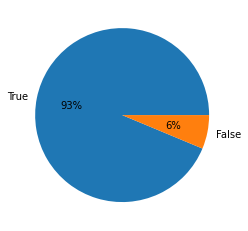

In [153]:
col = 'fl_matriz'

fig = plt.figure()
df[col].value_counts().plot(kind='pie', autopct='%d%%')
plt.ylabel('')


df[col].value_counts()

`de_natureza_juridica` é uma string que corresponde à natureza jurídica da empresa

* há 67 tipos de natureza jurídica no dataset
* 5 tipos correspondem a 95% dos dados
 * EMPRESARIO INDIVIDUAL: 63.98%
 * SOCIEDADE EMPRESARIA LIMITADA: 19.73%
 * ASSOCIACAO PRIVADA:	6.42%
 * EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA:	3.28%
 * ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO: 1.58%

In [ ]:
def col_value_pct_counts(df,col,n=len(df[col].value_counts())):
  df_col_value_counts = df[col].value_counts().nlargest(n)

  df_col_value_pct_counts = pd.concat([df_col_value_counts,
                                       df[col].value_counts(normalize=True)
                                       .nlargest(n)], axis=1)
  df_col_value_pct_counts.columns = ['Value', 'Pct']
  df_col_value_pct_counts['Value'] = (df_col_value_pct_counts['Value']
                                      .apply(lambda x : "{:,}".format(x)))
  df_col_value_pct_counts['Pct'] = ((df_col_value_pct_counts['Pct'] * 100)
                                     .round(2).astype(str) + '%')
  display(df_col_value_pct_counts)

  fig = plt.figure()
  # Divide the figure into a 1x2 grid, and give me the first section
  ax1 = fig.add_subplot(121)
  # Divide the figure into a 1x2 grid, and give me the second section
  ax2 = fig.add_subplot(122)

  df_col_value_counts.plot(kind='bar', ax=ax1);

  plt2 = df_col_value_counts.plot(kind='pie', autopct='%d%%', ax=ax2);
  ax2.set_ylabel('')

  return df_col_value_counts

,Value,Pct
EMPRESARIO INDIVIDUAL,"295,756",63.98%
SOCIEDADE EMPRESARIA LIMITADA,"91,231",19.73%
ASSOCIACAO PRIVADA,"29,694",6.42%
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA,"15,183",3.28%
ORGAO DE DIRECAO LOCAL DE PARTIDO POLITICO,"7,301",1.58%


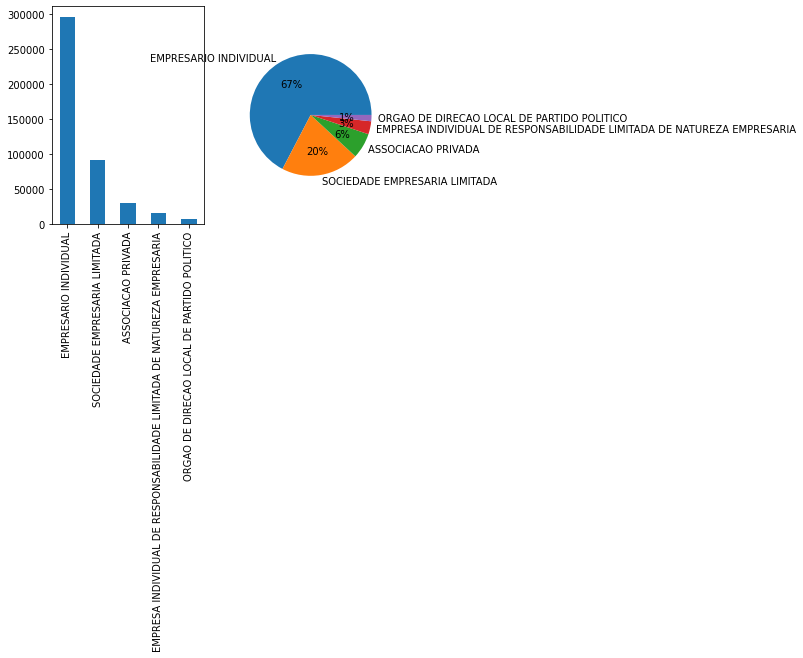

In [179]:
col = 'de_natureza_juridica'
col_value_pct_counts(df, col, n=5);

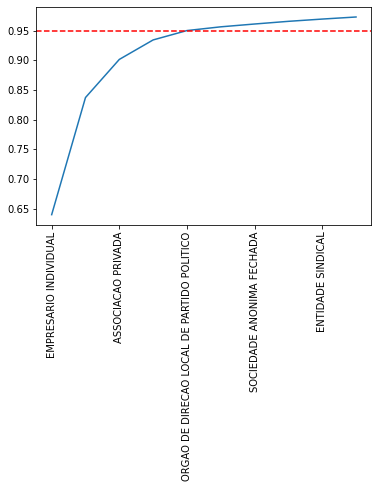

In [208]:
np.cumsum(df[col].value_counts(normalize=True).nlargest(10)).plot()
plt.axhline(y=0.95, color='r', ls='--')
plt.xticks(rotation=90)
plt.show()

In [176]:
df[col].value_counts(normalize=True).nlargest(5).sum().round(2)

0.95

In [155]:
len(df[col].value_counts())

67

`sg_uf` contém empresas distribuídas em 6 estados: MA, RN, AM, PI, RO, AC.

* 2: MA, PI situam-se na Região Nordeste do Brasil.
* 4: RN, AM, RO, AC situam-se na Região Norte do Brasil.
* Não contém `NaN`.

,Value,Pct
MA,"127,654",27.61%
RN,"98,837",21.38%
AM,"82,114",17.76%
PI,"76,686",16.59%
RO,"56,469",12.21%
AC,"20,538",4.44%


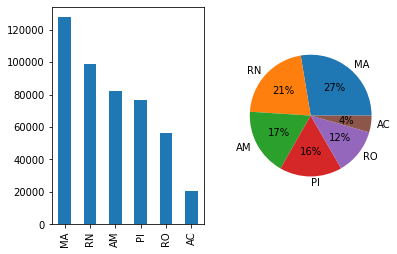

In [166]:
col = 'sg_uf'

df_col_value_counts = col_value_pct_counts(df, col)


In [107]:
df[col].isna().sum()

0

In [45]:
df.describe()

,Unnamed: 0,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.00000,462298.000000,280.000000,176.000000,30684.000000,30684.000000,6590.000000,460371.000000,460371.000000,1760.000000,336.000000,3683.000000,417022.000000,2.419000e+04,318469.000000,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,310696.000000,307381.000000,3251.000000,195115.000000,145029.000000,6743.000000,0.0,0.0,0.0,0.0,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.0,65391.000000,65391.000000,65391.000000,65147.000000,65147.000000,65147.000000,136.000000,136.000000,136.000000,65391.

In [44]:
def list_df_col_starts_with_str(df, str):
  filter_col = [col for col in df if col.startswith(str)]
  return filter_col

filter_col = list_df_col_starts_with_str(df, str='qt')
start_with = ['idade', 'grau', 'vl_frota', 'vl_total']
[filter_col.extend(list_df_col_starts_with_str(df, str)) for str in start_with]
filter_col

['qt_art',
 'qt_socios',
 'qt_socios_pf',
 'qt_socios_pj',
 'qt_socios_st_regular',
 'qt_socios_st_suspensa',
 'qt_socios_masculino',
 'qt_socios_feminino',
 'qt_socios_pep',
 'qt_alteracao_socio_total',
 'qt_alteracao_socio_90d',
 'qt_alteracao_socio_180d',
 'qt_alteracao_socio_365d',
 'qt_socios_pj_ativos',
 'qt_socios_pj_nulos',
 'qt_socios_pj_baixados',
 'qt_socios_pj_suspensos',
 'qt_socios_pj_inaptos',
 'qt_coligados',
 'qt_socios_coligados',
 'qt_coligados_matriz',
 'qt_coligados_ativo',
 'qt_coligados_baixada',
 'qt_coligados_inapta',
 'qt_coligados_suspensa',
 'qt_coligados_nula',
 'qt_coligados_sa',
 'qt_coligados_me',
 'qt_coligados_mei',
 'qt_coligados_ltda',
 'qt_coligados_epp',
 'qt_coligados_norte',
 'qt_coligados_sul',
 'qt_coligados_nordeste',
 'qt_coligados_centro',
 'qt_coligados_sudeste',
 'qt_coligados_exterior',
 'qt_ufs_coligados',
 'qt_regioes_coligados',
 'qt_ramos_coligados',
 'qt_coligados_industria',
 'qt_coligados_agropecuaria',
 'qt_coligados_comercio',
 '

Essas poderiam ser convertidas de `float` para `int`, contudo o `Pandas` não suporta `int` com `NaN`, por isso adotam-se duas práticas usuais:

1. Trabalhar com `float`
2. Trabalhar com `Int64`

Por simplicidade, optou-se pela 1a.

In [36]:
# filter_col = [df[col].astype('int32').dtypes for col in filter_col]
# filter_col = [df[col].dtypes('Int64') for col in filter_col]

KeyError: ignored

In [18]:
df[filter_]

KeyboardInterrupt: ignored

In [13]:
display(df.dtypes)

Unnamed: 0                                         int64
id                                                object
fl_matriz                                           bool
de_natureza_juridica                              object
sg_uf                                             object
natureza_juridica_macro                           object
de_ramo                                           object
setor                                             object
idade_empresa_anos                               float64
idade_emp_cat                                     object
fl_me                                               bool
fl_sa                                               bool
fl_epp                                              bool
fl_mei                                              bool
fl_ltda                                             bool
dt_situacao                                       object
fl_st_especial                                      bool
fl_email                       

0. fl_matriz: boolean value, true if the CNPJ corresponds to the "matriz".
1. de_natureza_juridica: character, juridic nature of the company.


In [ ]:
response.content

b'%PDF-1.4\n1 0 obj\n<<\n/Title (\xfe\xff\x00M\x00a\x00r\x00k\x00d\x00o\x00w\x00n\x00 \x00T\x00o\x00 \x00P\x00D\x00F)\n/Creator (\xfe\xff\x00w\x00k\x00h\x00t\x00m\x00l\x00t\x00o\x00p\x00d\x00f\x00 \x000\x00.\x001\x002\x00.\x003)\n/Producer (\xfe\xff\x00Q\x00t\x00 \x004\x00.\x008\x00.\x007)\n/CreationDate (D:20190709164709Z)\n>>\nendobj\n3 0 obj\n<<\n/Type /ExtGState\n/SA true\n/SM 0.02\n/ca 1.0\n/CA 1.0\n/AIS false\n/SMask /None>>\nendobj\n4 0 obj\n[/Pattern /DeviceRGB]\nendobj\n5 0 obj\n<<\n/Type /Page\n/Parent 2 0 R\n/Contents 8 0 R\n/Resources 10 0 R\n/Annots 11 0 R\n/MediaBox [0 0 595 842]\n>>\nendobj\n10 0 obj\n<<\n/ColorSpace <<\n/PCSp 4 0 R\n/CSp /DeviceRGB\n/CSpg /DeviceGray\n>>\n/ExtGState <<\n/GSa 3 0 R\n>>\n/Pattern <<\n>>\n/Font <<\n/F6 6 0 R\n/F7 7 0 R\n>>\n/XObject <<\n>>\n>>\nendobj\n11 0 obj\n[ ]\nendobj\n8 0 obj\n<<\n/Length 9 0 R\n/Filter /FlateDecode\n>>\nstream\nx\x9c\xed]]\xaf#)\x92}\xf7\xaf\xf0\xf3H\xedJ I@*\xb5T\x9f+\xad\xb4+\xb5\xaa\xa4yX\xedC\xab\xe6K\xa3\xa9\x

Não consegui extrair texto do pdf

In [ ]:
!pip install pdfplumber
import pdfplumber

with BytesIO(response.content) as open_pdf_file:
    pdf = pdfplumber.open(open_pdf_file)
    page = pdf.pages[0]
    text = page.extract_text()
    print(text)
    pdf.close()

TypeError: ignored

In [ ]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, 
                                  password=password,caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [ ]:
#!pip install pdfminer.six
from pdfminer.high_level import extract_text



text = extract_text(BytesIO(response.content))
print(text)

TypeError: ignored

In [ ]:
!pip install pdfplumber
import pdfplumber

with BytesIO(response.content) as open_pdf_file:
    pdf = pdfplumber.open(open_pdf_file)
    page = pdf.pages[0]
    text = page.extract_text()
    print(text)
    pdf.close()

TypeError: ignored

In [ ]:
!pip install tika
from tika import parser

with BytesIO(response.content) as open_pdf_file:
    rawText = parser.from_file(open_pdf_file)
    rawList = rawText['content'].splitlines()

  Created wheel for tika: filename=tika-1.24-cp36-none-any.whl size=32885 sha256=6f540711429b6cfcc3d251f88806efa55acf1dfb09a7f18fbdc3ee2deb7e459d
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika


AttributeError: ignored

In [ ]:
#!pip install PyPDF4==1.27.0
import PyPDF4

with BytesIO(response.content) as open_pdf_file:
    read_pdf = PyPDF4.PdfFileReader(open_pdf_file)
    num_pages = read_pdf.getNumPages()
    print(num_pages)
    text_list=[]
    for i in range(num_pages):
      page = read_pdf.getPage(i)
      page_content = page.extractText()
      text_list.append(page_content)


print(page_content)
print(read_pdf)
print(text_list)
# merge elements of a list to one single string
text = ''.join(text_list[:])

# eliminates \n characters (pdf text break)
test_str = text.replace('\n', '')
text

6

['', '', '', '', '', '']


''

In [ ]:
df.describe()

,Unnamed: 0,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,...,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.00000,462298.000000,280.000000,176.000000,30684.000000,30684.000000,6590.000000,460371.000000,460371.000000,1760.000000,336.000000,3683.000000,417022.000000,2.419000e+04,318469.000000,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,310696.000000,307381.000000,3251.000000,195115.000000,145029.000000,6743.000000,0.0,0.0,0.0,0.0,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,65391.000000,65391.000000,...,4.347850e+05,4.347850e+05,115254.000000,1.152630e+05,75942.000000,75942.000000,2906.000000,25890.000000,38895.000000,40143.000000,36729.000000,30408.000000,24290.000000,19037.000000,13975.000000,11026.000000,1884.000000,24896.000000,67797.000000,22727.000000,0.0,75942.000000,103574.000000,103574.000000,103574.000000,103574.000000,103574.000000,103560.000000,103560.000000,103560.000000,76261.000000,76261.000000,76261.000000,103574.000000,103574.000000,103574.000000,73888.000000,74014.000000,103574.000000,462298.000000
mean,231148.50000,9.948677,32.014286,3.818182,2.244329,1.177813,5.769044,3.591801,48.699177,134.597159,15.934524,15.892131,25.007247,1.694226e+05,1308.005725,1.496326,1.476681,0.019645,42.816452,44.344131,41.355225,1.396082,1.048600,1.353925,1.107117,5.992437,NaN,NaN,NaN,NaN,1.453785,0.007262,0.013424,0.004842,0.021787,15.633042,17.667913,13.741865,5.744093,11.110336,...,8.020911e+05,3.367205e+08,24.838418,1.109122e+04,55.699435,44.300577,2.197866,3.544998,4.247384,5.158932,5.634186,5.664661,5.480939,5.758155,6.115063,8.240522,2.248938,8.246465,11.496128,12.310336,NaN,16.706447,43.192861,2.101029,1.853148,27.698110,40.022679,41.965123,155.569411,16.200192,58.060498,96.661983,36.258851,12.324570,12.178529,14.343329,3.097607,-5.834288,9.510699,28.737044
std,133454.08171,9.615664,81.280168,6.797555,9.572536,6.589059,25.450950,72.600352,1206.696804,683.774506,29.708663,75.230681,9.679799,8.549075e+05,1161.889222,3.276626,3.258079,0.195166,12.626447,13.930385,12.514921,2.578793,0.234239,2.848980,0.840194,14.675005,NaN,NaN,NaN,NaN,0.840884,0.084919,0.124291,0.072522,0.177320,12.566365,14.650236,12.050708,24.271199,64.630753,...,3.099979e+07,7.114614e+09,192.458811,1.390161e+05,39.044407,39.044406,6.295785,20.727621,18.338771,30.416582,47.295036,53.753